In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from math import floor
from random import sample
from time import perf_counter

In [2]:
#import relevant variables from Berkley assignment
TEST_SET_SIZE = 100
DIGIT_DATUM_WIDTH=28
DIGIT_DATUM_HEIGHT=28
FACE_DATUM_WIDTH=60
FACE_DATUM_HEIGHT=70
value_dict = {' ': 0, '#': 1, '+': 1}

In [3]:
class Datum:
    def __init__(self, height, width) -> None:
        self.height = height
        self.width = width
        self.label = 0      # value of digit or 1 for face / 0 for not face
        self.pixels = []
        self.values = []
        self.type = ""

In [4]:
# return a tuple of datum lists corresponding with training, test, and validation data for digits
def loadDigitDatums(): 
    image_file = open("digitdata/trainingimages")
    label_file = open("digitdata/traininglabels")
    image_lines = image_file.read().splitlines()
    label_lines = label_file.read().splitlines()
    train_datums = []
    for i in range(0, len(image_lines), DIGIT_DATUM_HEIGHT):
        datum = Datum(DIGIT_DATUM_HEIGHT, DIGIT_DATUM_WIDTH)
        datum.pixels = np.array(image_lines[i:i+DIGIT_DATUM_HEIGHT])
        datum.values = np.array(list(map(lambda x: list(map(value_dict.get, x)), datum.pixels)))
        datum.label = int(label_lines[i//DIGIT_DATUM_HEIGHT])
        datum.type = "train"
        train_datums.append(datum)

    image_file = open("digitdata/testimages")
    label_file = open("digitdata/testlabels")
    image_lines = image_file.read().splitlines()
    label_lines = label_file.read().splitlines()
    test_datums = []
    for i in range(0, len(image_lines), DIGIT_DATUM_HEIGHT):
        datum = Datum(DIGIT_DATUM_HEIGHT, DIGIT_DATUM_WIDTH)
        datum.pixels = np.array(image_lines[i:i+DIGIT_DATUM_HEIGHT])
        datum.values = np.array(list(map(lambda x: list(map(value_dict.get, x)), datum.pixels)))
        datum.label = int(label_lines[i//DIGIT_DATUM_HEIGHT])
        datum.type = "test"
        test_datums.append(datum)

    image_file = open("digitdata/validationimages")
    label_file = open("digitdata/validationlabels")
    image_lines = image_file.read().splitlines()
    label_lines = label_file.read().splitlines()
    validation_datums = []
    for i in range(0, len(image_lines), DIGIT_DATUM_HEIGHT):
        datum = Datum(DIGIT_DATUM_HEIGHT, DIGIT_DATUM_WIDTH)
        datum.pixels = np.array(image_lines[i:i+DIGIT_DATUM_HEIGHT])
        datum.values = np.array(list(map(lambda x: list(map(value_dict.get, x)), datum.pixels)))
        datum.label = int(label_lines[i//DIGIT_DATUM_HEIGHT])
        datum.type = "validation"
        validation_datums.append(datum)

    return (train_datums, test_datums, validation_datums)

# return a tuple of datum lists corresponding with training, test, and validation data for faces
def loadFaceDatums(): 
    image_file = open("facedata/facedatatrain")
    label_file = open("facedata/facedatatrainlabels")
    image_lines = image_file.read().splitlines()
    label_lines = label_file.read().splitlines()
    train_datums = []
    for i in range(0, len(image_lines), FACE_DATUM_HEIGHT):
        datum = Datum(FACE_DATUM_HEIGHT, FACE_DATUM_WIDTH)
        datum.pixels = np.array(image_lines[i:i+FACE_DATUM_HEIGHT])
        datum.values = np.array(list(map(lambda x: list(map(value_dict.get, x)), datum.pixels)))
        datum.label = int(label_lines[i//FACE_DATUM_HEIGHT])
        datum.type = "train"
        train_datums.append(datum)

    image_file = open("facedata/facedatatest")
    label_file = open("facedata/facedatatestlabels")
    image_lines = image_file.read().splitlines()
    label_lines = label_file.read().splitlines()
    test_datums = []
    for i in range(0, len(image_lines), FACE_DATUM_HEIGHT):
        datum = Datum(FACE_DATUM_HEIGHT, FACE_DATUM_WIDTH)
        datum.pixels = np.array(image_lines[i:i+FACE_DATUM_HEIGHT])
        datum.values = np.array(list(map(lambda x: list(map(value_dict.get, x)), datum.pixels)))
        datum.label = int(label_lines[i//FACE_DATUM_HEIGHT])
        datum.type = "test"
        test_datums.append(datum)

    image_file = open("facedata/facedatavalidation")
    label_file = open("facedata/facedatavalidationlabels")
    image_lines = image_file.read().splitlines()
    label_lines = label_file.read().splitlines()
    validation_datums = []
    for i in range(0, len(image_lines), FACE_DATUM_HEIGHT):
        datum = Datum(FACE_DATUM_HEIGHT, FACE_DATUM_WIDTH)
        datum.pixels = np.array(image_lines[i:i+FACE_DATUM_HEIGHT])
        datum.values = np.array(list(map(lambda x: list(map(value_dict.get, x)), datum.pixels)))
        datum.label = int(label_lines[i//FACE_DATUM_HEIGHT])
        datum.type = "validation"
        validation_datums.append(datum)

    return (train_datums, test_datums, validation_datums)

    

In [5]:
(face_train_datums, face_test_datums, face_validation_datums) = loadFaceDatums()
(digit_train_datums, digit_test_datums, digit_validation_datums) = loadDigitDatums()

print(len(digit_train_datums))

5000


In [6]:
# use each individual pixel as a feature in the image, with values for blank, #, and + in the image

# f(xi, w)

def calculateValue(datum, bias, weights):
    value = bias
    weighted_values = datum.values * weights
    value += weighted_values.sum()
    return value

# return weights used in perceptron
def calculateWeightsFace(train_datums, limit = float('inf'), percentage = 1):
    weights = np.array([[0 for i in range(FACE_DATUM_WIDTH)] for i in range(FACE_DATUM_HEIGHT)])
    bias = 0
    
    modified = True
    iterations = 1

    while modified and iterations <= limit:
        print("Iteration", iterations)
        modified = False
        iterations += 1

        
        for i in sample(range(len(train_datums)), floor(len(train_datums) * percentage)):
            datum = train_datums[i]
            value = calculateValue(datum, bias, weights)
            if value >= 0 and datum.label == 0: 
                modified = True
                weights = weights - datum.values
                bias -= 1
            
            if value < 0 and datum.label == 1:
                modified = True
                weights = weights + datum.values
                bias += 1


    return (bias, weights)

def testAccuracyFace(test_datums, bias, weights):
    count = 0
    correct = 0

    for datum in test_datums:
        count += 1
        value = calculateValue(datum, bias, weights)
        if value >= 0 and datum.label == 1 or value < 0 and datum.label == 0:
            correct += 1

    print("Accuracy: ", correct / count)

    return correct / count

def calculateWeightsDigit(train_datums, limit = float('inf'), percentage = 1):
    weights = [np.array([[0 for i in range(DIGIT_DATUM_WIDTH)] for i in range(DIGIT_DATUM_HEIGHT)]) for i in range(10)]
    bias = [0 for i in range(10)]
    
    modified = True
    iterations = 1

    while modified and iterations <= limit:
        print("Iteration", iterations)
        modified = False
        iterations += 1

        for j in sample(range(len(train_datums)), floor(len(train_datums) * percentage)):
            datum = train_datums[j]
            for i in range(10):
                value = calculateValue(datum, bias[i], weights[i])
                if value >= 0 and datum.label != i: 
                    modified = True
                    weights[i] = weights[i] - datum.values
                    bias[i] -= 1
                
                if value < 0 and datum.label == i:
                    modified = True
                    weights[i] = weights[i] + datum.values
                    bias[i] += 1


    return (bias, weights)

def testAccuracyDigit(test_datums, bias, weights):
    count = 0
    correct = 0

    for datum in test_datums:
        count += 1
        max_value = float('-inf')
        label = 0
        for (b, w, i) in zip(bias, weights, range(10)):
            value = calculateValue(datum, b, w)
            if value > max_value:
                max_value = value
                label = i
        if datum.label == label:
            correct += 1

    print("Accuracy: ", correct / count)
    
    return correct / count



In [11]:
(bias, weights) = calculateWeightsFace(face_train_datums, percentage=1)

testAccuracyFace(face_test_datums, bias, weights)

(bias, weights) = calculateWeightsDigit(digit_train_datums, limit=10, percentage=0.1)

testAccuracyDigit(digit_test_datums, bias, weights)

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Accuracy:  0.86
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Accuracy:  0.767


0.767

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Accuracy:  0.8533333333333334
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Accuracy:  0.769
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Accuracy:  0.86
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Accuracy:  0.739
Iteration 1
Iteratio

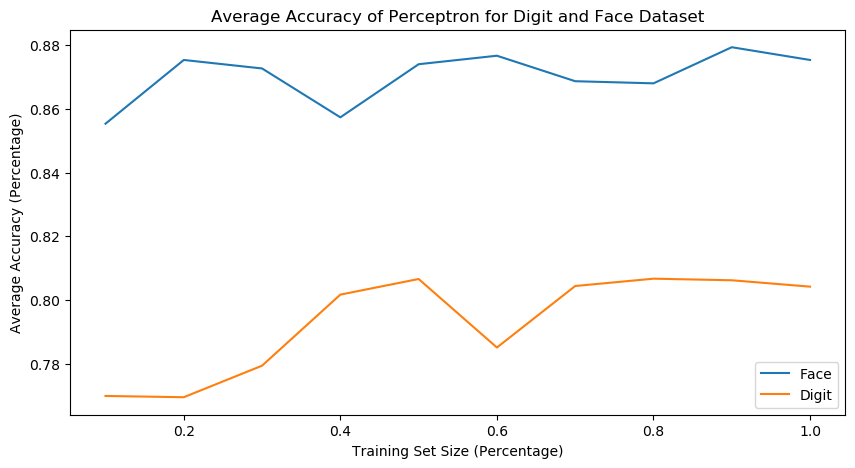

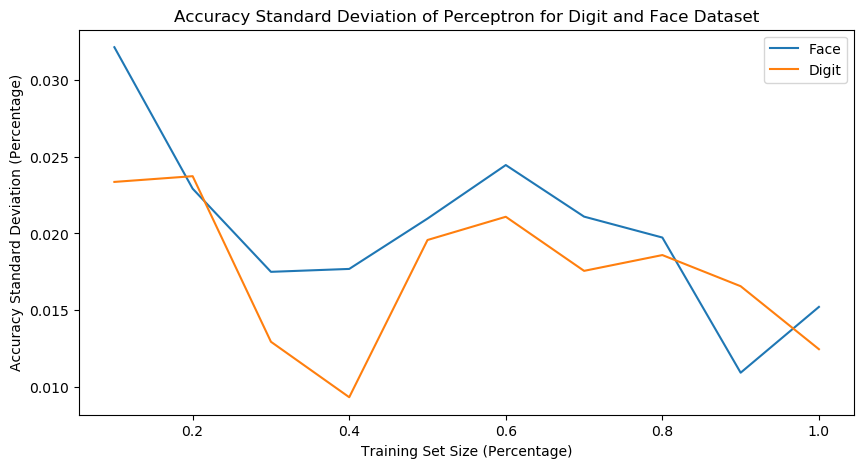

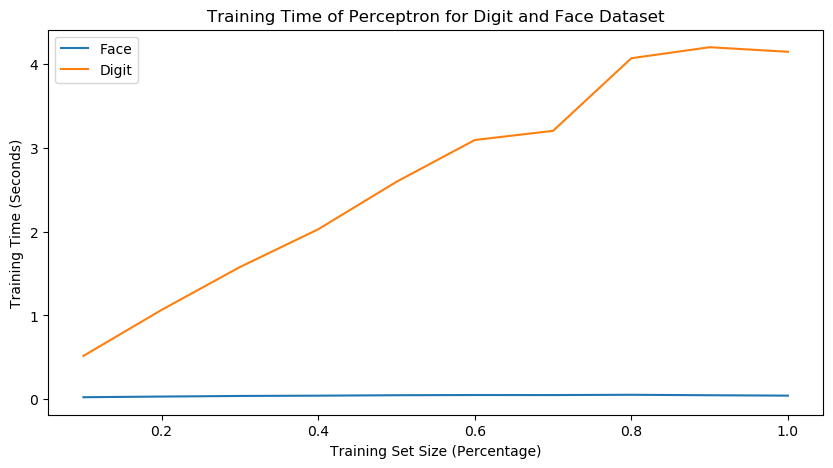

In [13]:
# plot averages and means

percentages = [round(x * 0.1, 1) for x in range(1, 11)]
face_averages = []
digits_averages = []
face_stddevs = []
digits_stddevs = []
face_timeavgs = []
digits_timeavgs = []

for percentage in percentages:
    face_accuracies = []
    digit_accuracies = []
    face_times = []
    digit_times = []

    for i in range(10):
        time_start = perf_counter()
        (bias, weights) = calculateWeightsFace(face_train_datums, percentage=percentage)
        time_end = perf_counter()
        face_times.append(time_end - time_start)
        face_accuracies.append(testAccuracyFace(face_test_datums, bias, weights))

        time_start = perf_counter()
        (bias, weights) = calculateWeightsDigit(digit_train_datums, limit=10, percentage=percentage)
        time_end = perf_counter()
        digit_times.append(time_end - time_start)
        digit_accuracies.append(testAccuracyDigit(digit_test_datums, bias, weights))

    face_averages.append(np.mean(face_accuracies))
    digits_averages.append(np.mean(digit_accuracies))

    face_stddevs.append(np.std(face_accuracies))
    digits_stddevs.append(np.std(digit_accuracies))

    face_timeavgs.append(np.mean(face_times))
    digits_timeavgs.append(np.mean(digit_times))


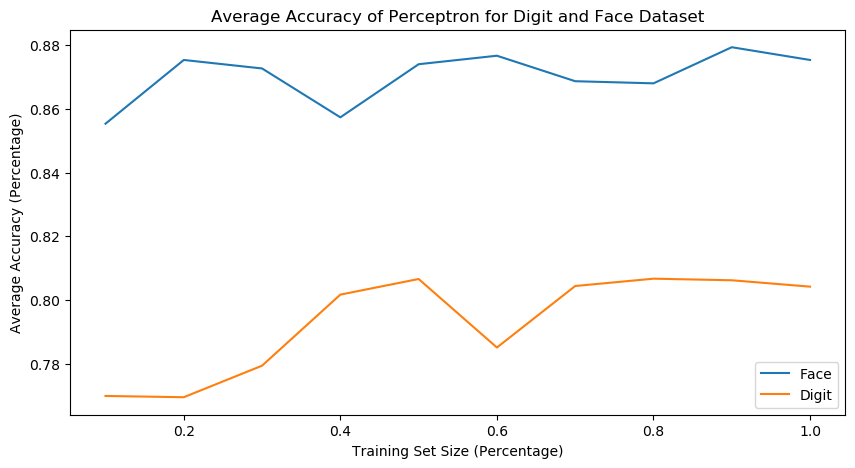

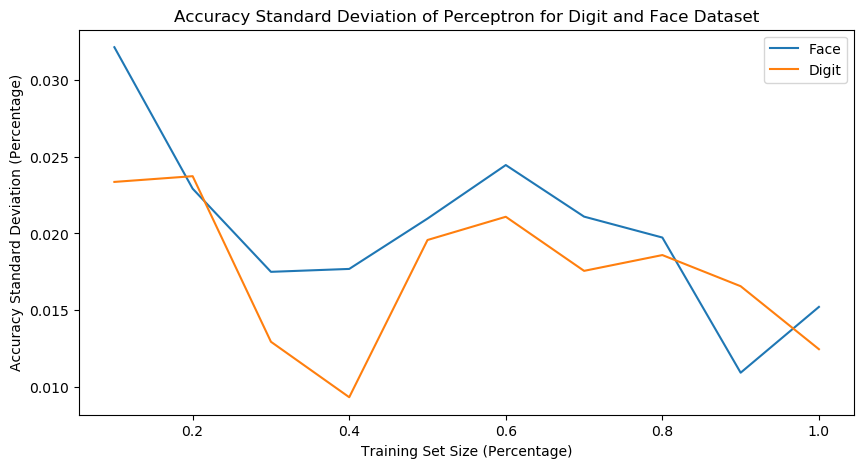

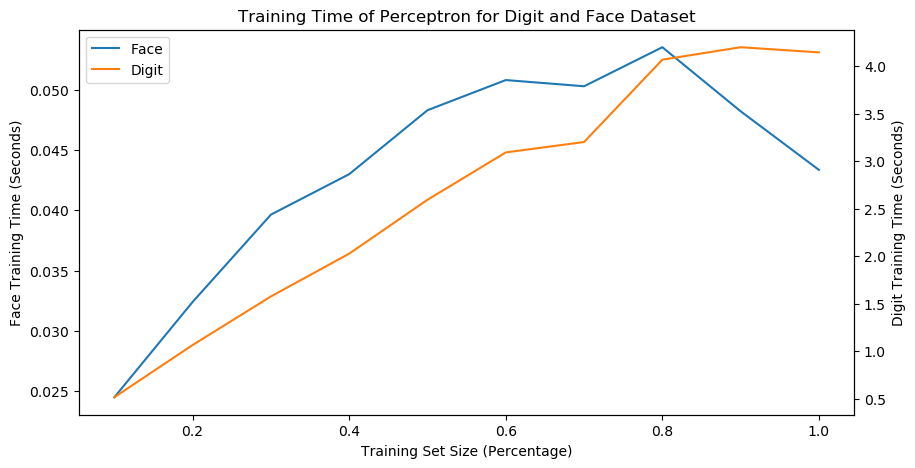

[0.024507371336221696, 0.032409999147057535, 0.039648822695016864, 0.04300309121608734, 0.04830513410270214, 0.05080407299101353, 0.05029087346047163, 0.0535271693021059, 0.048216677643358706, 0.04335559029132128]


In [25]:
#plots the results of the training
plt.figure(figsize=(10, 5))
plt.title("Average Accuracy of Perceptron for Digit and Face Dataset")
plt.xlabel('Training Set Size (Percentage)')
plt.ylabel('Average Accuracy (Percentage)')
plt.plot(percentages, face_averages, label="Face")
plt.plot(percentages, digits_averages, label="Digit")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Accuracy Standard Deviation of Perceptron for Digit and Face Dataset")
plt.xlabel('Training Set Size (Percentage)')
plt.ylabel('Accuracy Standard Deviation (Percentage)')
plt.plot(percentages, face_stddevs, label="Face")
plt.plot(percentages, digits_stddevs, label="Digit")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
ax1 = plt.subplot()
l1, = ax1.plot(percentages, face_timeavgs, color="C0")
ax2 = ax1.twinx()
l2, = ax2.plot(percentages, digits_timeavgs, color="C1")
plt.title("Training Time of Perceptron for Digit and Face Dataset")
ax1.set_xlabel('Training Set Size (Percentage)')
ax1.set_ylabel('Face Training Time (Seconds)')
ax2.set_ylabel('Digit Training Time (Seconds)')
plt.legend([l1, l2], ["Face", "Digit"])
plt.show()

print(face_timeavgs)